In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
# Reading dataset into a DataFrame
data = pd.read_csv('x06.txt', delim_whitespace=True, skiprows=37, index_col=0, names = ['age', 'temp', 'length'])

data.head()

,age,temp,length
1,14,25,620
2,28,25,1315
3,41,25,2120
4,55,25,2600
5,69,25,3110


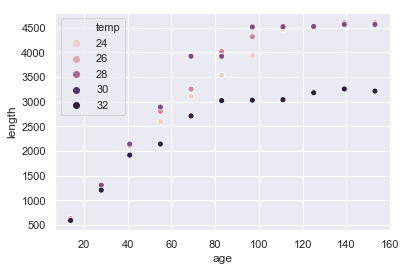

In [3]:
sns.scatterplot(x=data['age'], y = data['length'], hue=data['temp']);

In [4]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)

In [5]:
# Extracting data
X = data[['age', 'temp']]
y = data['length']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Making a split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# training the model
lm.fit(X_train, y_train)
print (lm.coef_, lm.intercept_);

[ 28.53627666 -75.42715901] 2876.4258678630267


In [9]:
# Let's make a prediction
y_pred = lm.predict(X_test)

In [10]:
print ('Score of model in training group: {0:2.2f}'.format(lm.score(X_train, y_train)))
print ('Score of model in test group: {0:2.2f}'.format(lm.score(X_test, y_test)))

Score of model in training group: 0.85
Score of model in test group: 0.56


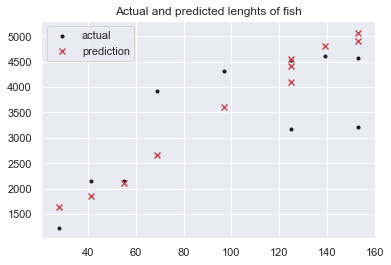

In [11]:
plt.scatter(x=X_test['age'], y = y_test, marker='.', c='k', label='actual')
plt.scatter(x=X_test['age'], y = y_pred, marker='x', c='r', label='prediction')
plt.title('Actual and predicted lenghts of fish')
plt.legend(loc='upper left');

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(2)
pX = poly.fit_transform(X)

In [14]:
pX_train, pX_test, py_train, py_test = train_test_split(pX, y)

In [15]:
lm.fit(pX_train, py_train);

In [16]:
# Let's make a prediction
py_pred = lm.predict(pX_test);

In [17]:
print ('Score of model in training group: {0:2.2f}'.format(lm.score(pX_train, py_train)))
print ('Score of model in test group: {0:2.2f}'.format(lm.score(pX_test, py_test)))

Score of model in training group: 0.98
Score of model in test group: 0.91


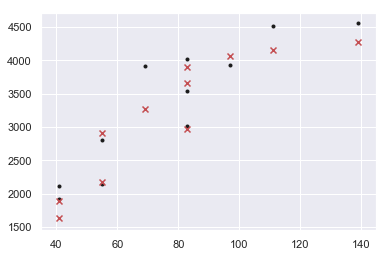

In [18]:
# With the polynomial change
plt.scatter(x=pX_test[:, 1], y = py_test, marker='.', c='k', label='actual')
plt.scatter(x=pX_test[:, 1], y = py_pred, marker='x', c='r', label='prediction');

In [19]:
print (X_test.shape)
print (pX_test.shape)

(11, 2)
(11, 6)


In [20]:
py_pred

array([4162.91210792, 3663.77164781, 3898.72559548, 2911.58963236,
       3271.82584507, 1886.13428684, 4061.19459113, 4269.16250729,
       1640.97941464, 2180.49533992, 2966.84292496])

In [21]:
py_test.values

array([4520, 3535, 4015, 2805, 3920, 2120, 3935, 4565, 1915, 2140, 3020],
      dtype=int64)

In [22]:
mat3 = np.array([[3, 5, 2], [7, 9, 1]])
print (mat3)

[[3 5 2]
 [7 9 1]]


In [23]:
poly.fit_transform(mat3)

array([[ 1.,  3.,  5.,  2.,  9., 15.,  6., 25., 10.,  4.],
       [ 1.,  7.,  9.,  1., 49., 63.,  7., 81.,  9.,  1.]])